# Typical Time History of the Electricity Production at Abbott Power Plant

Please see the ``README`` for instructions about accessing the data (UIUC Grid Data is currently not cleared for publication). 

In [3]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../../data/'
fy15 = read_csv(path+"2015_abbott_generation.csv",  
                    parse_dates=True, 
                    index_col = ['date'])
fy15 = fy15.rename(columns={"Value (KW)":"kw", 
                            "eDNA Status as String":"status"})

fy16 = read_csv(path+"2016_abbott_generation.csv",  
                    parse_dates=True, 
                    index_col = ['date'])
fy16 = fy16.rename(columns={"Value (KW)":"kw", 
                            "eDNA Status as String":"status"})

fy17 = read_csv(path+"2017_abbott_generation.csv",  
                    parse_dates=True, 
                    index_col = ['date'])
fy17 = fy17.rename(columns={"Value (KW)":"kw", 
                            "eDNA Status as String":"status"})

fy18 = read_csv(path+"2018_abbott_generation.csv", 
                    parse_dates=True, 
                    index_col = ['date'])
fy18 = fy18.rename(columns={"Value (KW)":"kw", 
                            "eDNA Status as String":"status"})

fy19 = read_csv(path+"2019_abbott_generation.csv",  
                    parse_dates=True, 
                    index_col = ['date'])
fy19 = fy19.rename(columns={"Value (KW)":"kw", 
                            "eDNA Status as String":"status"})

In [3]:
frames = [fy15, fy16, fy17, fy18, fy19]
time_series = pd.concat(frames)
# time_series.time = time_series.index
time_series

,kw,status
date,,
2014-07-01 00:00:00,21580.0,OK
2014-07-01 01:00:00,21626.0,OK
2014-07-01 02:00:00,21651.0,OK
2014-07-01 03:00:00,21599.0,OK
2014-07-01 04:00:00,21660.0,OK
...,...,...
2019-06-30 19:00:00,30813.0,OK
2019-06-30 20:00:00,30838.0,OK
2019-06-30 21:00:00,30731.0,OK


In [4]:
mask = time_series['status'] == 'UNRELIABLE'
time_series[mask]

,kw,status
date,,
2014-10-31 11:00:00,38982.0,UNRELIABLE
2014-10-31 12:00:00,38982.0,UNRELIABLE
2014-10-31 13:00:00,38982.0,UNRELIABLE
2014-10-31 14:00:00,38982.0,UNRELIABLE
2014-10-31 15:00:00,38982.0,UNRELIABLE
...,...,...
2014-11-03 11:00:00,38982.0,UNRELIABLE
2014-11-03 12:00:00,38982.0,UNRELIABLE
2014-11-03 13:00:00,38982.0,UNRELIABLE


/home/dotson/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


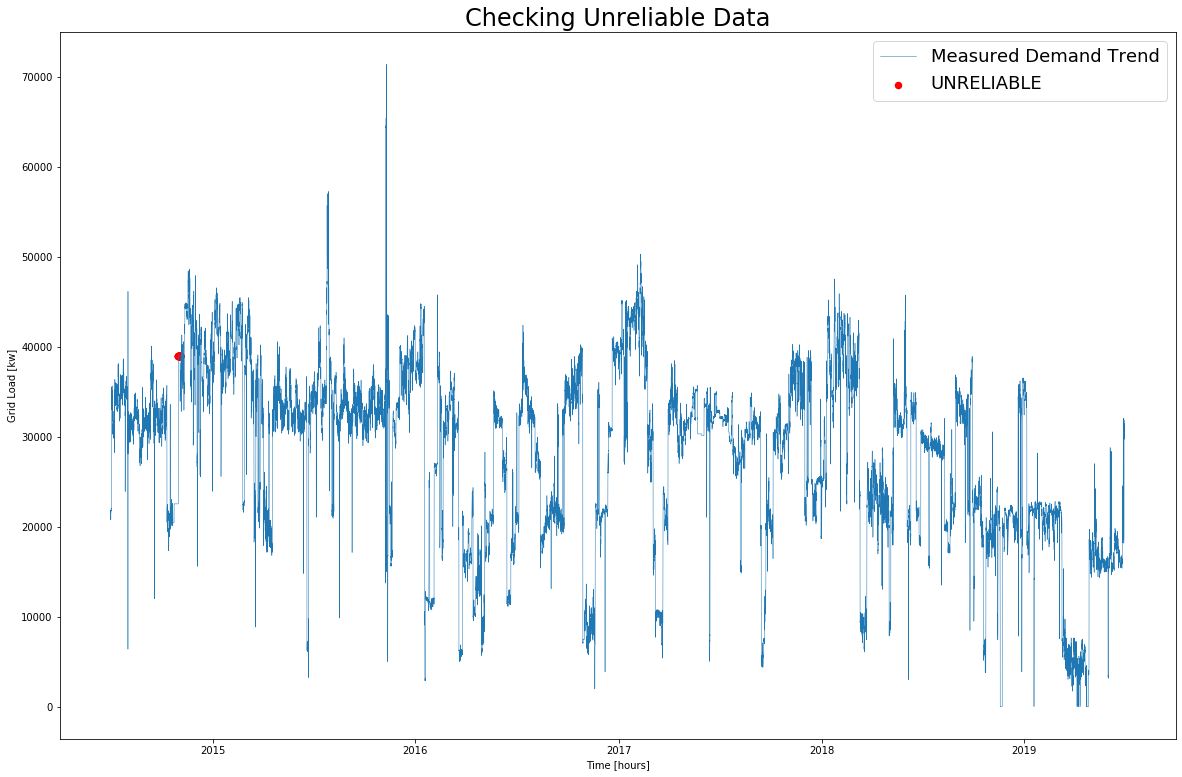

In [5]:
time_series_hours = time_series.copy()
time_series_hours['time'] = time_series_hours.index
time_series_hours
time_series_hours_unreliable = time_series_hours[mask]

fig = plt.figure(figsize=(20,13), facecolor='w')
trend = plt.plot(time_series_hours['time'], time_series_hours['kw'], lw=0.5, label="Measured Generation Trend")

legend = True
for hour, power in zip(list(time_series_hours_unreliable['time'].values), 
                       list(time_series_hours_unreliable['kw'].values)):
  if legend:
    # I only want it to show up on the legend once
    plt.scatter(hour, power, color='r',marker='o', linewidths=1.5,label='UNRELIABLE')
    legend = False
  else:
    plt.scatter(hour, power, color='r',marker='o', linewidths=1.5)



plt.legend(fontsize=18)
plt.title('Checking Unreliable Data', fontsize=24)
plt.xlabel('Time [hours]')
plt.ylabel('Generation [kWh]')
plt.show()

In [6]:
%%capture

grouped = time_series.groupby(time_series.index.year)

df15 = grouped.get_group(2015)
df16 = grouped.get_group(2016)[:8760] # must be same length as other years
df17 = grouped.get_group(2017)
df18 = grouped.get_group(2018)

df15.reset_index(inplace=True)
df16.reset_index(inplace=True)
df18.reset_index(inplace=True)
df17.reset_index(inplace=True)

df18['time'] = df18.index
df17['time'] = df17.index
df16['time'] = df16.index
df15['time'] = df15.index

df18 = df18[['time','kw']]
df17 = df17[['time','kw']]
df16 = df16[['time','kw']]
df15 = df15[['time','kw']]

In [7]:
df15

,time,kw
0,0,36303.0
1,1,36798.0
2,2,36712.0
3,3,36639.0
4,4,36656.0
...,...,...
8755,8755,36737.0
8756,8756,36786.0
8757,8757,36903.0
8758,8758,36788.0


In [8]:
# writes the header file for RAVEN
fname = 'annual_generation201'
keys = [fname + str(i) + '.csv' for i in range(5,9,1)]
header_file = pd.DataFrame({'scaling':np.zeros(len(keys), dtype=np.int8), 'filename':keys})
header_file.to_csv(path+'annual_generation_H.csv')
print(keys)

['annual_generation2015.csv', 'annual_generation2016.csv', 'annual_generation2017.csv', 'annual_generation2018.csv']


In [9]:
df15.to_csv(path+'annual_generation2015.csv')
df16.to_csv(path+'annual_generation2016.csv')
df17.to_csv(path+'annual_generation2017.csv')
df18.to_csv(path+'annual_generation2018.csv')

In [ ]:
!~/Research/raven/raven_framework ~/Research/2020-dotson-optimal-sizing/inputfiles/typical_generation.xml

In [8]:
typical_demand = pd.read_csv(path+"TypicalGeneration_0.csv")

typical_demand['date'] = pd.date_range(start='1/1/2018', end='1/1/2019', freq='H')[:8760]

/home/dotson/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


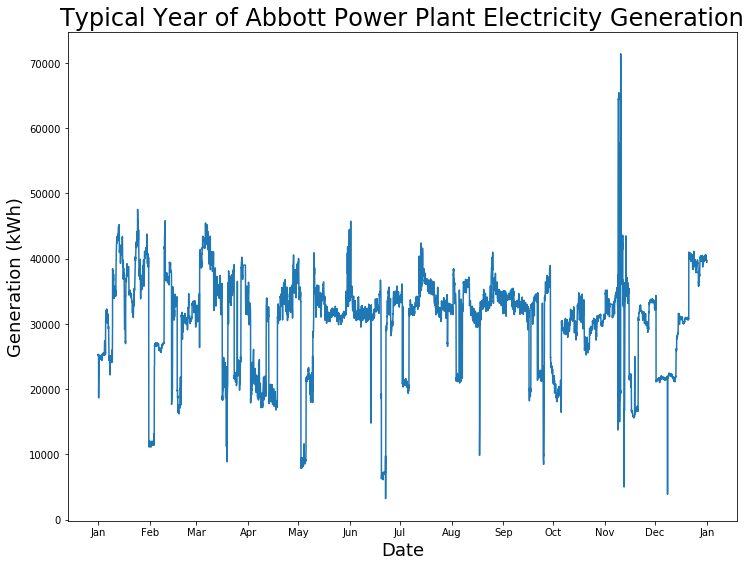

In [9]:
import matplotlib.dates as mdates


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

fig = plt.figure(figsize=(12,9), edgecolor='k', facecolor='w')
plt.plot(typical_demand.date, typical_demand.kw)
plt.title('Typical Year of Abbott Power Plant Electricity Generation', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Generation (kWh)',fontsize=18)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

In [10]:
!~/Research/raven/raven_framework ~/Research/2020-dotson-optimal-sizing/inputfiles/generation_arma.xml

CONDA
raven_libraries          /home/dotson/anaconda3/envs/raven_libraries
Running RAVEN in "opt" mode.
/home/dotson/Research/raven/framework/utils/utils.py:579: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, os.path
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/statsmodels/base/wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'colle

(    0.05 sec) SIMULATION               : DEBUG           -> Reading type MultiRun with name sampleARMA
(    0.06 sec) STEP MULTIRUN            : DEBUG           -> move this tests to base class when it is ready for all the classes
(    0.06 sec) STEP MULTIRUN            : DEBUG           -> the mapping used in the model for checking the compatibility of usage should be more similar to self.parList to avoid the double mapping below FIXME
(    0.06 sec) STEP MULTIRUN            : DEBUG           -> reactivate check on Input as soon as loadCsv gets out from the PostProcessor models!
(    0.06 sec) STEP MULTIRUN            : DEBUG           -> ------Reading Completed for:
(    0.06 sec) STEP MULTIRUN            : DEBUG           ->        Class          : MultiRun        from <class 'Steps.SingleRun'>
(    0.06 sec) STEP MULTIRUN            : DEBUG           ->        Type           : MultiRun
(    0.06 sec) STEP MULTIRUN            : DEBUG           ->        Name           : sampleARMA


(    5.13 sec) STEP MULTIRUN            : DEBUG           -> Just collected output  1 of the input      1
(    5.13 sec) STEP MULTIRUN            : DEBUG           -> Testing if the sampler is ready to generate a new input
(    5.13 sec) MonteCarlo               : DEBUG           -> Found new point to sample: {'scaling': 1.0}
(    5.30 sec) STEP MULTIRUN            : DEBUG           -> Just collected output  1 of the input      2
(    5.30 sec) STEP MULTIRUN            : DEBUG           -> Testing if the sampler is ready to generate a new input
(    5.30 sec) MonteCarlo               : DEBUG           -> Found new point to sample: {'scaling': 1.0}
(    5.48 sec) STEP MULTIRUN            : DEBUG           -> Just collected output  1 of the input      3
(    5.48 sec) STEP MULTIRUN            : DEBUG           -> Testing if the sampler is ready to generate a new input
(    5.48 sec) MonteCarlo               : DEBUG           -> Found new point to sample: {'scaling': 1.0}
(    5.66 sec) S

In [11]:
path = '../../data/'
synthetic_history = pd.read_csv(path+"generationHistories_2.csv")

Text(0.5, 1.0, 'Synthetic and Typical Generation Histories')

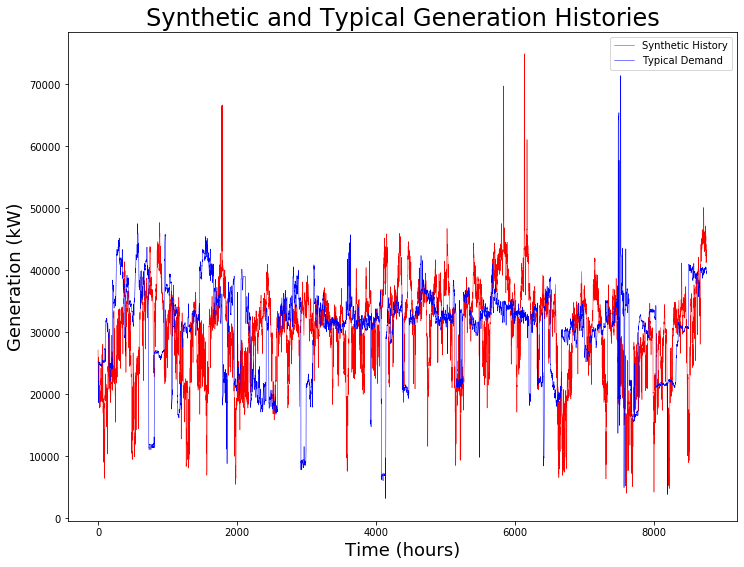

In [12]:
# plot synthetic history
fig = plt.figure(figsize=(12,9), edgecolor='k', facecolor='w')
plt.plot(synthetic_history['time'], synthetic_history['kw'], 
         color='r',lw = 0.5, label='Synthetic History')
plt.plot(typical_demand['time'], typical_demand['kw'], 
         color='b', lw=0.5, label='Typical Demand')
plt.ylabel("Generation (kW)", fontsize=18)
plt.xlabel("Time (hours)", fontsize=18)
plt.legend()
plt.title("Synthetic and Typical Generation Histories", fontsize=24)

In [13]:
print("Average typical generation is {}. Average synthetic generation is {}".format(typical_demand.kw.mean(), synthetic_history.kw.mean()))

Average typical generation is 30569.348284474927. Average synthetic generation is 30245.610270470144
